FinanceDataReader설명서 
- https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [2]:
from io import StringIO 
from datetime import datetime

import pandas as pd
import numpy as np 

import FinanceDataReader as fdr

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [72]:
txt = """
날짜	누적손익	누적수익률	평균투자금액
2022-4	-84227	-5.38	1563939
2022-5	0	0.00	1520175
2022-6	0	0.00	1520175
2022-7	-2014	-0.13	1521800
2022-8	8905	0.58	1522889
2022-9	0	0.00	1527065
2022-10	2869	0.18	1528174
2022-11	3096	0.20	1533022
2022-12	-144	0.00	1532929
2023-1	33746	2.18	1543658
2023-2	62184	3.84	1619117
2023-3	58833	3.54	1657504
2023-4	21452	1.26	1702580
2023-5	-1404	-0.08	1707971
2023-6	54114	3.16	1709120
2023-7	23252	1.30	1784613
2023-8	0	0.00	1785067
2023-9	1833	0.10	1786857
2023-10	-16208	-0.91	1773078
2023-11	0	0.00	1770692
2023-12	33981	1.88	1799258
"""

from io import StringIO 
df = pd.read_csv(StringIO(txt), sep='\t')
df['date'] = [ datetime.strptime(x, '%Y-%m') for x in df['날짜']] 


# 전월 대비 수익률 증감 구하기 : 수익률 = ( 전월 - 당월 ) / 전월  
# 코인 가격 월별 수익률 계산
ret = fdr.DataReader('BTC/KRW', '2022')
ser = ret['Close'].resample('MS').mean()
res = pd.concat([ser, 
                 ( ser - ser.shift(1) ) / ser.shift(1)], 
                axis=1, keys=['BTC_PRICE', 'BTC_RET'])
res['date'] = res.index

df = df.merge(res, how='left', on='date')
df.index = df['date']

df.tail()

,날짜,누적손익,누적수익률,평균투자금액,date,BTC_PRICE,BTC_RET
date,,,,,,,
2023-08-01,2023-8,0,0.00,1785067,2023-08-01,3.695134e+07,-0.045605
2023-09-01,2023-9,1833,0.10,1786857,2023-09-01,3.502174e+07,-0.052220
2023-10-01,2023-10,-16208,-0.91,1773078,2023-10-01,3.984679e+07,0.137773
2023-11-01,2023-11,0,0.00,1770692,2023-11-01,4.774409e+07,0.198192
2023-12-01,2023-12,33981,1.88,1799258,2023-12-01,5.517689e+07,0.155680


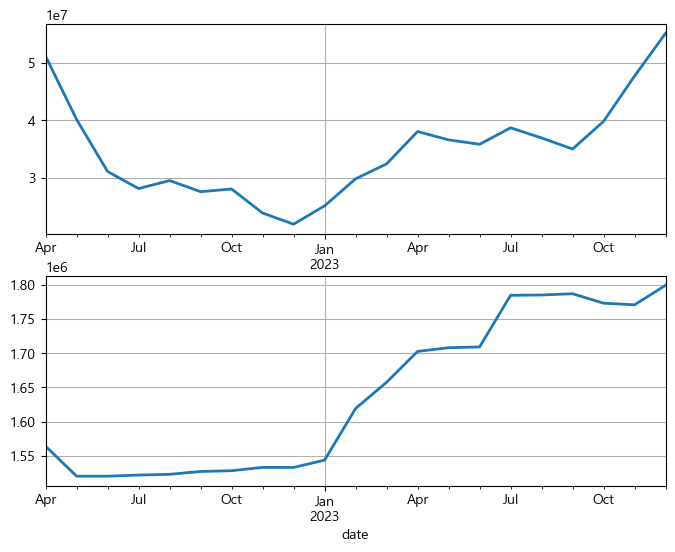

In [76]:
plt.figure(figsize=(8,6))

plt.subplot(211)
df['BTC_PRICE'].plot()

plt.subplot(212)
df['평균투자금액'].plot();

In [77]:
df.tail()

,날짜,누적손익,누적수익률,평균투자금액,date,BTC_PRICE,BTC_RET
date,,,,,,,
2023-08-01,2023-8,0,0.00,1785067,2023-08-01,3.695134e+07,-0.045605
2023-09-01,2023-9,1833,0.10,1786857,2023-09-01,3.502174e+07,-0.052220
2023-10-01,2023-10,-16208,-0.91,1773078,2023-10-01,3.984679e+07,0.137773
2023-11-01,2023-11,0,0.00,1770692,2023-11-01,4.774409e+07,0.198192
2023-12-01,2023-12,33981,1.88,1799258,2023-12-01,5.517689e+07,0.155680


In [84]:
# 누적 수익률 계산 
def get_cum_ret(st, ed):
    return (ed - st) / st 

print("포트수익률 : ", 
      get_cum_ret(df['평균투자금액'][0], df['평균투자금액'][-1]))

print("코인수익률 : ", 
      get_cum_ret(df['BTC_PRICE'][0], df['BTC_PRICE'][-1]))

포트수익률 :  0.1504655872128005
코인수익률 :  0.07781019879972285


In [80]:
# 승률 계산 
df['승률_포트'] = np.where(df['누적손익']>=0, 1, 0)
df['승률_코인'] = np.where(df['BTC_RET']>=0, 1, 0)

df[['승률_포트', '승률_코인']].mean()

승률_포트    0.761905
승률_코인    0.476190
dtype: float64

In [ ]:
### ------ 절취선 ------ ###  

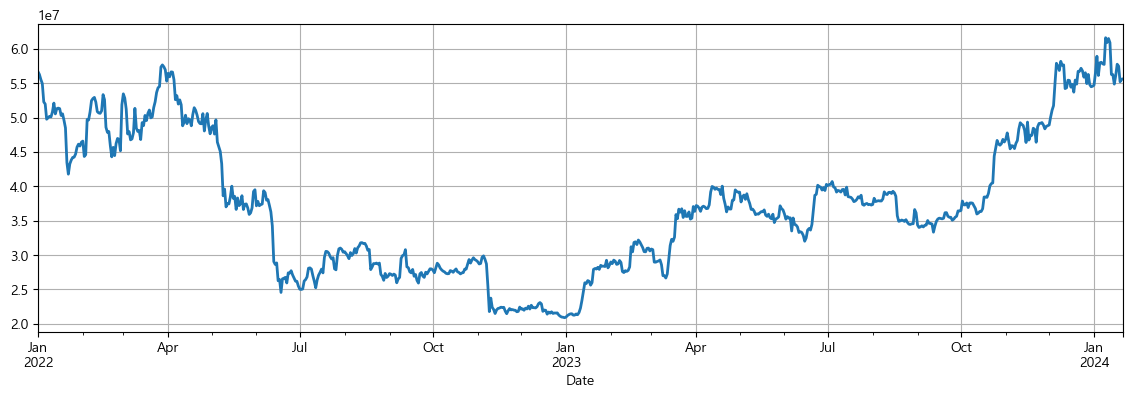

In [12]:
# 코인 가격 
df = fdr.DataReader('BTC/KRW', '2022')
df['Close'].plot();

In [ ]:
# 승률 계산 (0도 승x에 포함. 즉, 손실만 제외)